# 1) CNN(Convolutional Neural Networks) Nedir


### 
Evrişimsel Sinir Ağı (Convolutional Neural Network, CNN), bilgisayarla görme  projelerinde önemli bir yer tutan ve derin öğrenme alanında yaygın olarak kullanılan bir algoritmadır.
Bu algoritma, girdi görüntülerindeki uzaysal ve zamansal bilgileri koruyarak anlamlı özelliklerin çıkarılmasına olanak tanır

###
CNN'lerin başarısının temelinde, evrişim katmanları, havuzlama (pooling) katmanları ve tam bağlantılı (fully connected) katmanlar gibi özel yapısal bileşenler yer almaktadır. Evrişim katmanları, görüntüdeki yerel özellikleri tespit ederken, havuzlama katmanları bu özelliklerin boyutunu azaltarak hesaplama verimliliğini artırır. Tam bağlantılı katmanlar ise bu özellikleri sınıflandırma veya tahmin etme işlemlerinde kullanır

## 1.1) Convolution (Evrişim) Nedir?

###
Evrişim, dijital görüntü işleme ve derin öğrenme alanlarında sıklıkla kullanılan temel bir işlemdir. Bu işlem, bir görüntü üzerinde belirli bir boyutta filtre (veya çekirdek, kernel) kaydırılarak, görüntünün farklı özelliklerini çıkarmayı amaçlar. Evrişim işlemi, görüntüdeki kenarlar, dokular, renkler ve diğer önemli ayrıntıları tespit etmek için kullanılır. Evrişim işlemlerinin adımları sırasıyla şunlardır:

1. Filtre Tanımlama: 
Filtre, genellikle küçük boyutlu (3x3 veya 5x5) bir matristir. Her filtre, belirli bir özelliği vurgulamak için tasarlanmıştır. Örneğin, kenar algılama için farklı, bulanıklaştırma için farklı filtreler kullanılır.

2. Filtrenin Görüntü Üzerinde Kaydırılması: 
Filtre, giriş görüntüsünün sol üst köşesine yerleştirilir. Filtrenin her bir elemanı, görüntünün karşılık gelen bölgesiyle çarpılır. Çarpım sonuçları toplanarak yeni bir piksel değeri elde edilir. Filtre, görüntü boyunca belirli bir adım (stride) ile kaydırılır ve bu işlem tüm görüntü üzerinde tekrarlanır. Padding, görüntünün kenarlarına eklenen ekstra piksel sayısıdır ve genellikle görüntünün boyutunu kontrol etmek veya kenar bilgilerini korumak amacıyla kullanılır. Bu çalışmada, stride değeri 1 ve padding değeri 0 olarak belirlenmiştir.

3. Sonuç: 
Filtre uygulandıktan sonra, her bir konumda elde edilen değerler yeni bir görüntü oluşturur. Bu yeni görüntü, orijinal görüntünün belirli özelliklerini vurgular veya değiştirir.

![CNN](cnn1.png)


##  1.2) İleri Besleme (Forward Pass) Nedir?

### 
İleri besleme, yapay sinir ağlarında giriş verisinin ağ boyunca ileriye doğru taşınması ve her bir katmanda çıktı değerlerinin hesaplanması sürecidir. Bu süreç, ağın tahmin yapabilmesi için gereklidir ve genellikle eğitim (training) ve çıkarım (inference) aşamalarının temelini oluşturur. İleri besleme, ağın ağırlıklarını güncellemek için gerekli olan hatayı hesaplamadan önce gerçekleşir.  İleri besleme adımları sırasıyla şöyledir:

    1. Girdi Verisinin Alınması: 
    Ağın ilk katmanına (genellikle giriş katmanı) sunulan ham veri setidir. Bu, bir görüntü, metin veya herhangi bir sayısal veri olabilir. Örneğin, bir görüntü sınıflandırma ağında, giriş verisi genellikle piksel değerlerinden oluşan bir matristir.

    2. Evrişim Katmanları: 
    Girdi verisi, bir veya birden fazla evrişim katmanından geçirilir. Her evrişim katmanı, belirli sayıda filtre kullanarak giriş verisinin özelliklerini çıkarır. Filtreler, görüntüdeki kenarlar, dokular, renkler gibi düşük seviyeli özellikleri tespit eder. Matematiksel olarak, her filtre ile giriş verisi arasında evrişim işlemi gerçekleştirilir.

    Denklem 1’de gösterilmektedir. Burada “*” konvolüsyon işlemini ve Bias filtreye eklenen sabit bir değerdir.

					Çıkış= Giriş * Filtre + Bias (1)

    3. Aktivasyon Fonksiyonları: 
    Her evrişim katmanının ardından, doğrusal olmayan bir aktivasyon fonksiyonu uygulanır. Aktivasyon fonksiyonları, ağa doğrusal olmayanlık kazandırarak daha karmaşık ilişkileri öğrenmesini sağlar. Yaygın kullanılan aktivasyon fonksiyonları arasında ReLU (Rectified Linear Unit) bulunur [5]. Denklem 2’de ReLU’ya ait eşitlik bulunmaktadır.

					RELU=> f(x)=max(0,x) (2)

    4. Havuzlama Katmanları: 
    Evrişim katmanlarından sonra, boyut azaltma ve hesaplama maliyetini düşürmek için havuzlama katmanları kullanılır. Maksimum Havuzlama (Max Pooling) gibi teknikler uygulanarak, özellik haritalarının boyutu küçültülür. Max Pooling, matris üzerinde belirli boyutlarda kaydırılarak işlemi gerçekleştirir ve her bölgeden maksimum değeri seçerek yeni bir, daha küçük boyutlu çıktı matrisi oluşturur. Max Pooling’ e ait örnek Şekil 4’te gösterilmektedir

<img src="havuzlama.png" width="80%" height="auto">


###

    5. Tam Bağlantı Katmanları: Evrişim ve havuzlama katmanlarından sonra, genellikle bir veya daha fazla tam bağlantılı (dense) katman bulunur. Bu katmanlar, öğrenilen özellikleri kullanarak nihai çıktıyı üretir. Tam bağlantılı katmanlarda, her nöron bir önceki katmandaki tüm nöronlara bağlıdır. Matematiksel olarak Denklem 3’te gösterildiği gibi ağrılık matrisi ile giriş verisi çarpılıp sabit bir değer olan bias eklenir.

                     Çıkış= Giriş x Ağırlık MAtrisi + Bias (3)
    
    6. Çıkış Katmanı: Ağın son katmanıdır ve modelin tahminini üretir. Sınıflandırma görevlerinde, genellikle Softmax aktivasyon fonksiyonu kullanılır. Denklem 4’te Softmax fonksiyonuna ait eşitlik bulunmaktadır. Bu fonksiyon, her sınıfa ait olma olasılığı hesaplar.

    ## Softmax Fonksiyonu

Softmax fonksiyonu şu şekilde tanımlanır:

$$
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}}
$$

Burada:
- $x_i$: i. elemanın skor değeri
- $K$: toplam eleman sayısı
- $\sum_{j=1}^{K}$: tüm elemanlar üzerinde toplam


								  	(4)
İleri beslemede, eğitim sırasında modelin Model, verilen bir giriş verisi için tahmin üretir.Bu tahmin, eğitim sürecinde modelin ne kadar doğru olduğunu değerlendirmek için kullanılır. Ardından tahmin edilen değer ile gerçek değer arasındaki fark hesaplanır. Bu farka hata denir. Hata, modelin performansını ölçmek için kullanılan bir kayıp fonksiyonu (loss function) ile hesaplanır. İleri besleme sırasında hesaplanan değerler geri yayılım algoritması için gerekli olan ara değerlerin hesaplanmasını sağlar. Bu ara değerler, hatanın her bir ağırlığa nasıl dağıldığını belirlemek için kullanılır

## Softmax Fonksiyonu

Softmax fonksiyonu şu şekilde tanımlanır:

$$
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}}
$$

Burada:
- $x_i$: i. elemanın skor değeri
- $K$: toplam eleman sayısı
- $\sum_{j=1}^{K}$: tüm elemanlar üzerinde toplam

In [ ]:
!pip install tensorflow -U

In [ ]:
import tensorflow as tf

In [9]:
(train_images,train_labels),(test_images, test_labels)=tf.keras.datasets.cifar10.load_data()

In [10]:
train_images.shape

(50000, 32, 32, 3)

(50000, 32, 32, 3)

50000 --> Satır sayısı, 50000 adet resim

  32  --> Fotoğraf matrislerinin her birisinin satır sayısı = 32 px

  32  --> Fotoğraf matrislerinin her bir sütun sayısı = 32 px
  
  3   --> Kanal sayısı(RGB) 

In [11]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], shape=(50000, 1), dtype=uint8)

In [12]:
test_images.shape

(10000, 32, 32, 3)

In [13]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], shape=(10000, 1), dtype=uint8)

In [14]:
y_labels = ['Uçak', 'Araba', 'Kuş', 'Kedi', 'Geyik', 'Köpek', 'Kurbağa', 'At', 'Gemi', 'Kamyon']


'Köpek'

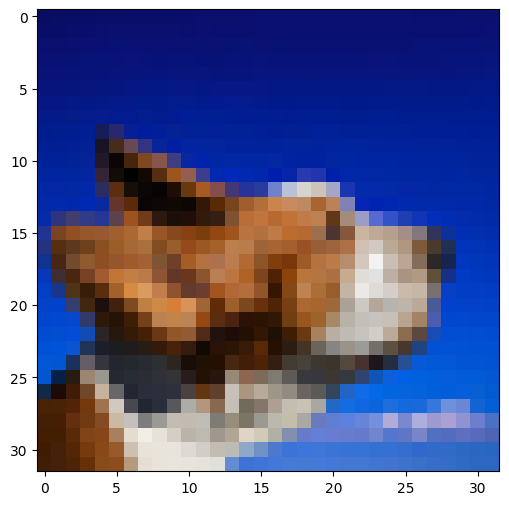

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(train_images[15987])

y_labels[train_labels[15987][0]]


CNN Modeli

In [16]:
model=tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.add(tf.keras.layers.Conv2D(32,(3,3),strides=(2,1),padding='same',activation='relu'))

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 15, 32)      │         9,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,144 (39.62 KB)

 Trainable params: 10,144 (39.62 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.add(tf.keras.layers.BatchNormalization())

In [24]:
model.add(tf.keras.layers.Conv2D(32,(3,3),kernel_initializer=tf.keras.initializers.random_normal(0.001), use_bias=False, activation='relu'))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 15, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 15, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 13, 32)      │         9,216 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,488 (76.12 KB)

 Trainable params: 19,424 (75.88 KB)

 Non-trainable params: 64 (256.00 B)

In [26]:
model.add(tf.keras.layers.Flatten())
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 15, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 15, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 13, 32)      │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2496)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,488 (76.12 KB)

 Trainable params: 19,424 (75.88 KB)

 Non-trainable params: 64 (256.00 B)

Full Connected Layer


In [28]:
model.add(tf.keras.layers.Dense(2496,activation='relu',use_bias=False,kernel_initializer=tf.keras.initializers.random_normal()))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 15, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 15, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 13, 32)      │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2496)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2496)           │     6,230,016 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,249,504 (23.84 MB)

 Trainable params: 6,249,440 (23.84 MB)

 Non-trainable params: 64 (256.00 B)

In [29]:
model.add(tf.keras.layers.Dense(len(set(list(y_labels))),activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 15, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 15, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 13, 32)      │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2496)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2496)           │     6,230,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        24,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,274,474 (23.94 MB)

 Trainable params: 6,274,410 (23.93 MB)

 Non-trainable params: 64 (256.00 B)

In [46]:
model.compile(optimizer='rmsprop',loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [47]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
checkpointer=tf.keras.callbacks.ModelCheckpoint('best_cnn_model.h5',monitor='val_loss',verbose=1,save_best_only=True)

callers=[early_stopping,checkpointer]



In [48]:
x_train = train_images.astype('float32')
x_test = test_images.astype('float32')

In [50]:
x_train = train_images/255
x_test = test_images/255

In [44]:
y_train=tf.keras.utils.to_categorical(train_labels,len(set(list(y_labels))))
y_test=tf.keras.utils.to_categorical(test_labels,len(set(list(y_labels))))

In [51]:
model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2,callbacks=callers)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4165 - loss: 1.7290
Epoch 1: val_loss improved from None to 1.43293, saving model to best_cnn_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 69ms/step - accuracy: 0.4985 - loss: 1.4260 - val_accuracy: 0.5246 - val_loss: 1.4329
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6547 - loss: 0.9977
Epoch 2: val_loss improved from 1.43293 to 1.26602, saving model to best_cnn_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 69ms/step - accuracy: 0.6590 - loss: 0.9850 - val_accuracy: 0.5934 - val_loss: 1.2660
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7697 - loss: 0.6677
Epoch 3: val_loss improved from 1.26602 to 1.04968, saving model to best_cnn_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 71ms/step - accuracy: 0.7669 - loss: 0.6827 - val_accuracy: 0.6662 - val_loss: 1.0497
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8709 - loss: 0.3798
Epoch 4: val_loss did not improve from 1.04968
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 136s 66ms/step - accuracy: 0.8632 - loss: 0.4038 - val_accuracy: 0.6380 - val_loss: 1.4004
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9359 - loss: 0.1926
Epoch 5: val_loss did not improve from 1.04968
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.9302 - loss: 0.2082 - val_accuracy: 0.6303 - val_loss: 1.7810
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9646 - loss: 0.1110
Epoch 6: val_loss did not improve from 1.04968
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.9594 - loss: 0.1257 - val_accuracy: 0.6236 - val_loss: 2.2205
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9741 - loss: 0.0793
Epoch 7: val_loss 

In [53]:
load_model=tf.keras.models.load_model('best_cnn_model.h5')

In [57]:
import tensorflow as tf

load_model = tf.keras.models.load_model("best_cnn_model.h5")
print("Model loaded successfully!")

Model loaded successfully!


In [58]:
predictions = load_model.predict(x_test,batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [59]:
predictions

array([[7.8086967e-05, 5.5077887e-04, 1.2411372e-04, ..., 4.5180856e-05,
        1.2945903e-03, 8.1628235e-04],
       [1.4031808e-02, 6.6591933e-02, 2.5273465e-08, ..., 5.1496690e-10,
        9.1904449e-01, 3.3178605e-04],
       [5.6987923e-01, 5.0053500e-02, 5.0782487e-03, ..., 1.1992934e-02,
        1.6247149e-01, 1.8615754e-01],
       ...,
       [9.1920623e-07, 4.2142904e-08, 8.3610567e-04, ..., 2.1030751e-04,
        1.3192990e-06, 7.4094100e-07],
       [1.0792140e-04, 9.8886269e-01, 5.0099643e-05, ..., 5.6207455e-06,
        2.6262678e-06, 1.0324296e-02],
       [1.1309386e-09, 1.0414929e-07, 6.0283861e-07, ..., 9.9742246e-01,
        2.2068158e-09, 2.1058305e-07]], shape=(10000, 10), dtype=float32)

In [60]:
predictions[0]

array([7.8086967e-05, 5.5077887e-04, 1.2411372e-04, 9.5118654e-01,
       5.3710169e-03, 3.7091166e-02, 3.4421778e-03, 4.5180856e-05,
       1.2945903e-03, 8.1628235e-04], dtype=float32)

In [61]:
y_labels

['Uçak',
 'Araba',
 'Kuş',
 'Kedi',
 'Geyik',
 'Köpek',
 'Kurbağa',
 'At',
 'Gemi',
 'Kamyon']

In [64]:
import numpy as np

predicted_labels_index=np.argmax(predictions,axis=1)
predicted_labels_index

array([3, 8, 0, ..., 5, 1, 7], shape=(10000,))

In [68]:
predicted_classes = [y_labels[y] for y in (predicted_labels_index)]

In [69]:
predicted_classes

['Kedi',
 'Gemi',
 'Uçak',
 'Uçak',
 'Geyik',
 'Kurbağa',
 'Araba',
 'Kurbağa',
 'Kedi',
 'Araba',
 'Uçak',
 'Kamyon',
 'Köpek',
 'At',
 'Kamyon',
 'Gemi',
 'Köpek',
 'Kedi',
 'Gemi',
 'Kurbağa',
 'Kedi',
 'Uçak',
 'Kuş',
 'Kamyon',
 'Geyik',
 'Geyik',
 'Geyik',
 'Uçak',
 'Kamyon',
 'Kurbağa',
 'Kedi',
 'Geyik',
 'Kuş',
 'Kedi',
 'Kamyon',
 'Kedi',
 'Geyik',
 'Kamyon',
 'Kamyon',
 'Köpek',
 'Uçak',
 'Kurbağa',
 'Kedi',
 'Kurbağa',
 'Uçak',
 'Kamyon',
 'Köpek',
 'Kamyon',
 'At',
 'Kuş',
 'Kamyon',
 'Gemi',
 'At',
 'Kedi',
 'Gemi',
 'Gemi',
 'Kedi',
 'Köpek',
 'Köpek',
 'Geyik',
 'At',
 'Köpek',
 'Kurbağa',
 'Kedi',
 'Kurbağa',
 'Kuş',
 'Gemi',
 'Kuş',
 'Kedi',
 'Geyik',
 'Gemi',
 'Kedi',
 'Gemi',
 'Gemi',
 'Uçak',
 'Kuş',
 'Uçak',
 'Kedi',
 'Kedi',
 'Gemi',
 'Gemi',
 'Araba',
 'Araba',
 'At',
 'Kedi',
 'At',
 'Kuş',
 'Gemi',
 'Gemi',
 'Kamyon',
 'Uçak',
 'Kedi',
 'Gemi',
 'Kurbağa',
 'Geyik',
 'Kurbağa',
 'Kurbağa',
 'Uçak',
 'Uçak',
 'Kedi',
 'Geyik',
 'At',
 'Kurbağa',
 'Kedi',
 'Arab

In [78]:
predicted_classes[1608]

'Geyik'

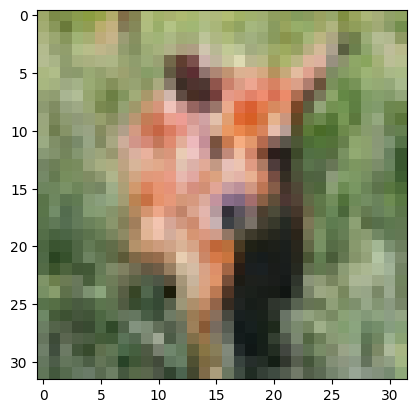

In [79]:
plt.imshow(test_images[1608])

In [80]:
y_labels[test_labels[1608][0]]

'Geyik'